In [3]:
import os
import numpy as np
from skimage.io import imread
from skimage.filters import laplace
from scipy.stats import entropy as scipy_entropy

def compute_nr_iqa(image):
    """
    Calculates no-reference image quality assessment (NR-IQA) features for a given image.

    Args:
        image (np.ndarray): The grayscale image for which to calculate NR-IQA features.

    Returns:
        dict: A dictionary containing the calculated NR-IQA features:
            - Standard Deviation: Standard deviation of pixel intensity values.
            - Laplacian Variance: Variance of the Laplacian filter applied to the image.
            - Entropy: Image entropy calculated using skimage.metrics.entropy.
    """

    std_dev = np.std(image)
    laplacian_img = laplace(image, ksize=3)  # Apply the Laplacian filter
    laplacian_var = np.var(laplacian_img)  # Compute the variance of the Laplacian
    # Calculate global entropy
    hist, _ = np.histogram(image, bins=256, range=(0, 256))
    prob_dist = hist / np.sum(hist)
    entropy_val = scipy_entropy(prob_dist, base=2)

    return {
        'Standard Deviation': std_dev,
        'Laplacian Variance': laplacian_var,
        'Entropy': entropy_val,
    }

# Define the folders to process
folders = ['/Users/dolorious/Desktop/Dissertation/HonoursProject-CS4529-Blind-Denoising-Within-FFC-MRI/ProjectCode/Algorithms/TraditionalMethods/Experiments/DenoisedImages/RealPatientDataDenoising/BM3D/',
           '/Users/dolorious/Desktop/Dissertation/HonoursProject-CS4529-Blind-Denoising-Within-FFC-MRI/ProjectCode/Algorithms/TraditionalMethods/Experiments/DenoisedImages/RealPatientDataDenoising/BM4D/',
           '/Users/dolorious/Desktop/Dissertation/HonoursProject-CS4529-Blind-Denoising-Within-FFC-MRI/ProjectCode/Algorithms/TraditionalMethods/Experiments/DenoisedImages/RealPatientDataDenoising/NLM/',
           '/Users/dolorious/Desktop/Dissertation/HonoursProject-CS4529-Blind-Denoising-Within-FFC-MRI/ProjectCode/Algorithms/TraditionalMethods/Experiments/DenoisedImages/RealPatientDataDenoising/NoisyData_N2F/',
           '/Users/dolorious/Desktop/Dissertation/HonoursProject-CS4529-Blind-Denoising-Within-FFC-MRI/ProjectCode/Algorithms/TraditionalMethods/Experiments/DenoisedImages/RealPatientDataDenoising/TV/',
           '/Users/dolorious/Desktop/Dissertation/HonoursProject-CS4529-Blind-Denoising-Within-FFC-MRI/ProjectCode/Algorithms/TraditionalMethods/Experiments/DenoisedImages/RealPatientDataDenoising/NoisyData_N2S/',
           '/Users/dolorious/Desktop/Dissertation/HonoursProject-CS4529-Blind-Denoising-Within-FFC-MRI/ProjectCode/Algorithms/TraditionalMethods/Experiments/DenoisedImages/RealPatientDataDenoising/Patch2Self/']


avg_results = {}

for folder in folders:
    results = []

    # Loop through each image in the folder
    for filename in os.listdir(folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.tif')):
            image_path = os.path.join(folder, filename)
            # Read the image
            image = imread(image_path)
            image = image / 255

           
            nr_iqa_features = compute_nr_iqa(image)
            results.append(nr_iqa_features)



    # Compute the average values for each feature
    avg_std_dev = np.mean([result['Standard Deviation'] for result in results])
    avg_laplacian_var = np.mean([result['Laplacian Variance'] for result in results])
    avg_entropy = np.mean([result['Entropy'] for result in results])

    # Store the average values in the avg_results dictionary
    avg_results[folder] = {
        'Average Standard Deviation': avg_std_dev,
        'Average Laplacian Variance': avg_laplacian_var,
        'Average Entropy': avg_entropy
    }

# Display the results
for folder, result in avg_results.items():
    print(f"Results for {folder}:")
    for feature, value in result.items():
        print(f"{feature}: {value:.4f}")
    print()



Results for /Users/dolorious/Desktop/Dissertation/HonoursProject-CS4529-Blind-Denoising-Within-FFC-MRI/ProjectCode/Algorithms/TraditionalMethods/Experiments/DenoisedImages/RealPatientDataDenoising/BM3D/:
Average Standard Deviation: 0.3823
Average Laplacian Variance: 0.3804
Average Entropy: 0.8114

Results for /Users/dolorious/Desktop/Dissertation/HonoursProject-CS4529-Blind-Denoising-Within-FFC-MRI/ProjectCode/Algorithms/TraditionalMethods/Experiments/DenoisedImages/RealPatientDataDenoising/BM4D/:
Average Standard Deviation: 0.3823
Average Laplacian Variance: 0.3804
Average Entropy: 0.8114

Results for /Users/dolorious/Desktop/Dissertation/HonoursProject-CS4529-Blind-Denoising-Within-FFC-MRI/ProjectCode/Algorithms/TraditionalMethods/Experiments/DenoisedImages/RealPatientDataDenoising/NLM/:
Average Standard Deviation: 0.3868
Average Laplacian Variance: 0.3760
Average Entropy: 0.8114

Results for /Users/dolorious/Desktop/Dissertation/HonoursProject-CS4529-Blind-Denoising-Within-FFC-MRI/P

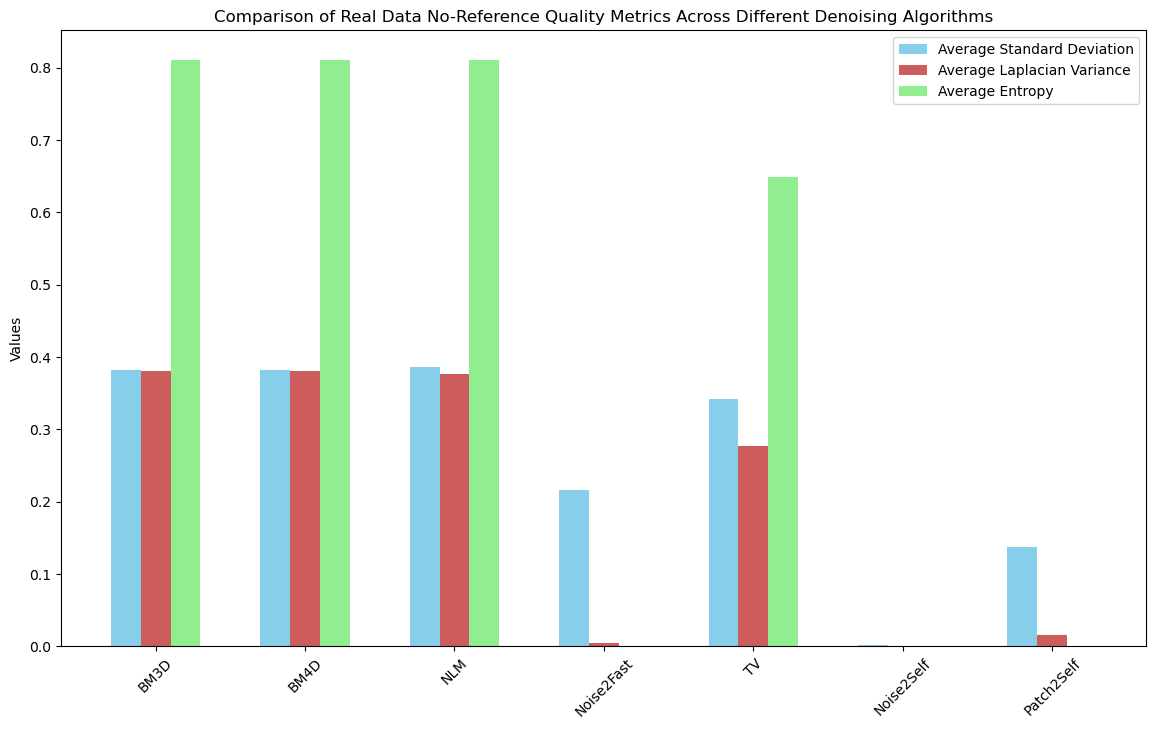

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Updated data for real patient data
algorithms = ['BM3D', 'BM4D', 'NLM', 'Noise2Fast', 'TV', 'Noise2Self', 'Patch2Self']
avg_std_devs = [0.3823, 0.3823, 0.3868, 0.2165, 0.3424, 0.0015, 0.1369]  # Updated average standard deviations
avg_laplacian_vars = [0.3804, 0.3804, 0.3760, 0.0048, 0.2767, 0.0000, 0.0157]  # Updated average laplacian variances
avg_entropies = [0.8114, 0.8114, 0.8114, 0.0000, 0.6493, 0.0000, 0.0000]  # Updated average entropies

x = np.arange(len(algorithms))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 8))

# Plotting each metric
ax.bar(x - width, avg_std_devs, width=width, label='Average Standard Deviation', color='SkyBlue')
ax.bar(x, avg_laplacian_vars, width=width, label='Average Laplacian Variance', color='IndianRed')
ax.bar(x + width, avg_entropies, width=width, label='Average Entropy', color='LightGreen')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Values')
ax.set_title('Comparison of Real Data No-Reference Quality Metrics Across Different Denoising Algorithms')

ax.set_xticks(x)
ax.set_xticklabels(algorithms)
ax.legend()

# Rotate the tick labels for better readability
plt.xticks(rotation=45)

plt.show()
